Analysis
1. There is no cities between Latitude -60° to -90° and there is no data between 80° to 90°. 
2. The highest temperature is at Latitude 0 area and the temperature gradually getting cooler to forwds to pole area.
3. The humidity level > 50 in most cities in this season (September).

In [100]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
from citipy import citipy

### Generate Cities List

In [101]:
city_list=[]
lat_list=[]
lng_list=[]
for i in range (2000):
    lat=np.random.uniform(-90,90)
    lng=np.random.uniform(-180,180)
    city=(citipy.nearest_city(lat, lng)).city_name
    if city not in city_list and len(city_list) < 500:
            city_list.append(city)
            lat_list.append(lat)
            lng_list.append(lng)
#city_list 
df = pd.DataFrame({"City": city_list, "Random Generated Lat": lat_list, "Random Generated Lng": lng_list})
df.head()

,City,Random Generated Lat,Random Generated Lng
0,port alfred,-49.051934,33.271327
1,rikitea,-35.309269,-141.482160
2,leshukonskoye,64.538736,45.297250
3,belmonte,-15.518971,-35.215344
4,lebu,-34.919993,-105.081420


### Perform API Calls

In [102]:
# Request Parameters
#Please use a valid api_key to test this code simpllly replace "****" to you api-key.
api_key = "*************************************"
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
print('Beginning Data Retrieval')
print('-----------------------------')
# Counter
row_count = 0
set_count = 1
for index, row in df.iterrows():           
        #print(row)
        # Print log to ensure loop is working correctly
        print("Processing Record " + str(row_count) + " of Set " + str(set_count) + " | "+ row["City"] )
        target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=%s&appid=%s" % (row["City"],units,api_key)
        #target_url ="http://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b1b15e88fa797225412429c1c50c122a1"
        cities_data = requests.get(target_url).json()
        try:
            df.set_value(index, "Cloudiness", cities_data["clouds"]["all"])
            df.set_value(index, "Country", cities_data["sys"]["country"])
            df.set_value(index, "Date", cities_data[str("dt")])
            df.set_value(index, "Humidity", cities_data["main"]["humidity"])
            df.set_value(index, "City Lat", cities_data["coord"]["lat"])
            df.set_value(index, "City Lng", cities_data["coord"]["lon"])
            df.set_value(index, "Max Temp", cities_data["main"]["temp_max"])
            df.set_value(index, "Wind Speed", cities_data["wind"]["speed"])
            print(target_url)
            row_count= row_count + 1
        except:
            print("Error with city data. Skipping")
            row_count= row_count + 1    
        if row_count == 50:
            time.sleep(5)
            set_count +=1 
            row_count = 0
        continue
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------' )

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?q=port alfred&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 1 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 2 of Set 1 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?q=leshukonskoye&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 3 of Set 1 | belmonte
http://api.openweathermap.org/data/2.5/weather?q=belmonte&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 4 of Set 1 | lebu
http://api.openweathermap.org/data/2.5/weather?q=lebu&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 5 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 6 of Set 1 

http://api.openweathermap.org/data/2.5/weather?q=talnakh&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 4 of Set 2 | kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 5 of Set 2 | hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 6 of Set 2 | thompson
http://api.openweathermap.org/data/2.5/weather?q=thompson&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 7 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 8 of Set 2 | cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 9 of Set 2 | calnali
http://api.openweathermap.org/data/2.5/weather?q=calnali&units=imperial&appid=58ce6f83f7b27e81c5

Processing Record 8 of Set 3 | kilindoni
http://api.openweathermap.org/data/2.5/weather?q=kilindoni&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 9 of Set 3 | caruray
http://api.openweathermap.org/data/2.5/weather?q=caruray&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 10 of Set 3 | codrington
http://api.openweathermap.org/data/2.5/weather?q=codrington&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 11 of Set 3 | koudougou
http://api.openweathermap.org/data/2.5/weather?q=koudougou&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 12 of Set 3 | torbay
http://api.openweathermap.org/data/2.5/weather?q=torbay&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 13 of Set 3 | filadelfia
http://api.openweathermap.org/data/2.5/weather?q=filadelfia&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 14 of Set 3 | georgetown
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?q=san quintin&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 13 of Set 4 | swan river
http://api.openweathermap.org/data/2.5/weather?q=swan river&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 14 of Set 4 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?q=comodoro rivadavia&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 15 of Set 4 | fort nelson
http://api.openweathermap.org/data/2.5/weather?q=fort nelson&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 16 of Set 4 | soderhamn
http://api.openweathermap.org/data/2.5/weather?q=soderhamn&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 17 of Set 4 | hobyo
http://api.openweathermap.org/data/2.5/weather?q=hobyo&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 18 of Set 4 | serik
http://api.openweathermap.org/data/2.5/weather?q=serik&u

http://api.openweathermap.org/data/2.5/weather?q=boralday&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 18 of Set 5 | kodiak
http://api.openweathermap.org/data/2.5/weather?q=kodiak&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 19 of Set 5 | launceston
http://api.openweathermap.org/data/2.5/weather?q=launceston&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 20 of Set 5 | shenkursk
http://api.openweathermap.org/data/2.5/weather?q=shenkursk&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 21 of Set 5 | beaverlodge
http://api.openweathermap.org/data/2.5/weather?q=beaverlodge&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 22 of Set 5 | swakopmund
http://api.openweathermap.org/data/2.5/weather?q=swakopmund&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 23 of Set 5 | takab
http://api.openweathermap.org/data/2.5/weather?q=takab&units=imperial&app

http://api.openweathermap.org/data/2.5/weather?q=luau&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 23 of Set 6 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 24 of Set 6 | anadyr
http://api.openweathermap.org/data/2.5/weather?q=anadyr&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 25 of Set 6 | nargana
http://api.openweathermap.org/data/2.5/weather?q=nargana&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 26 of Set 6 | rocha
http://api.openweathermap.org/data/2.5/weather?q=rocha&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 27 of Set 6 | karaul
http://api.openweathermap.org/data/2.5/weather?q=karaul&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 28 of Set 6 | kieta
http://api.openweathermap.org/data/2.5/weather?q=kieta&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Pr

http://api.openweathermap.org/data/2.5/weather?q=tikhvin&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 28 of Set 7 | utiroa
http://api.openweathermap.org/data/2.5/weather?q=utiroa&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 29 of Set 7 | nelson bay
http://api.openweathermap.org/data/2.5/weather?q=nelson bay&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 30 of Set 7 | nanortalik
http://api.openweathermap.org/data/2.5/weather?q=nanortalik&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 31 of Set 7 | arkhara
http://api.openweathermap.org/data/2.5/weather?q=arkhara&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 32 of Set 7 | sinnamary
http://api.openweathermap.org/data/2.5/weather?q=sinnamary&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 33 of Set 7 | sinkat
http://api.openweathermap.org/data/2.5/weather?q=sinkat&units=imperial&appid=58ce

http://api.openweathermap.org/data/2.5/weather?q=evanston&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 32 of Set 8 | sibu
http://api.openweathermap.org/data/2.5/weather?q=sibu&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 33 of Set 8 | vaitupu
http://api.openweathermap.org/data/2.5/weather?q=vaitupu&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 34 of Set 8 | molepolole
http://api.openweathermap.org/data/2.5/weather?q=molepolole&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 35 of Set 8 | ozgon
http://api.openweathermap.org/data/2.5/weather?q=ozgon&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 36 of Set 8 | matagami
http://api.openweathermap.org/data/2.5/weather?q=matagami&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 37 of Set 8 | high level
http://api.openweathermap.org/data/2.5/weather?q=high level&units=imperial&appid=58ce6f83f7b

http://api.openweathermap.org/data/2.5/weather?q=te anau&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 36 of Set 9 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?q=ponta delgada&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 37 of Set 9 | thai binh
http://api.openweathermap.org/data/2.5/weather?q=thai binh&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 38 of Set 9 | axim
http://api.openweathermap.org/data/2.5/weather?q=axim&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 39 of Set 9 | jieshou
http://api.openweathermap.org/data/2.5/weather?q=jieshou&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 40 of Set 9 | paracuru
http://api.openweathermap.org/data/2.5/weather?q=paracuru&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 41 of Set 9 | mrirt
http://api.openweathermap.org/data/2.5/weather?q=mrirt&units=imperial&appid=58ce6f83

http://api.openweathermap.org/data/2.5/weather?q=seoul&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 42 of Set 10 | arua
http://api.openweathermap.org/data/2.5/weather?q=arua&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 43 of Set 10 | nishihara
http://api.openweathermap.org/data/2.5/weather?q=nishihara&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 44 of Set 10 | vysokogornyy
http://api.openweathermap.org/data/2.5/weather?q=vysokogornyy&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 45 of Set 10 | sungai siput utara
http://api.openweathermap.org/data/2.5/weather?q=sungai siput utara&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 46 of Set 10 | ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?q=ulaanbaatar&units=imperial&appid=58ce6f83f7b27e81c55f7154f71e8b82
Processing Record 47 of Set 10 | basoko
http://api.openweathermap.org/data/2.5/weather?q=baso

In [103]:
df.head()

,City,Random Generated Lat,Random Generated Lng,Cloudiness,Country,Date,Humidity,City Lat,City Lng,Max Temp,Wind Speed
0,port alfred,-49.051934,33.271327,88.0,ZA,1.505232e+09,78.0,-33.59,26.89,69.01,11.16
1,rikitea,-35.309269,-141.482160,12.0,PF,1.505232e+09,100.0,-23.12,-134.97,70.00,13.62
2,leshukonskoye,64.538736,45.297250,68.0,RU,1.505232e+09,87.0,64.90,45.76,42.82,3.78
3,belmonte,-15.518971,-35.215344,90.0,BR,1.505228e+09,88.0,-15.86,-38.88,73.40,16.11
4,lebu,-34.919993,-105.081420,0.0,CL,1.505232e+09,100.0,-37.62,-73.65,52.00,22.68


In [104]:
unix_time=int(df['Date'].max())
# local_time = time.localtime(unix_time, '%Y%m%d%H%M%S')
#datetime.datetime.today().strftime('%Y-%m-%d').strftime('%Y-%m-%d %H:%M:%S')
dt=datetime.datetime.fromtimestamp(unix_time).strftime('%m/%d/%Y %H:%M:%S')
local_date=dt.split(' ', 1)[0]
local_date

'09/12/2017'

### Latitude vs Temperature Plot

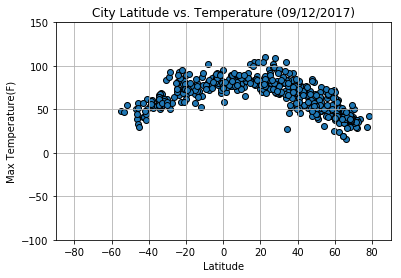

In [105]:
# Build a scatter plot for each data type
plt.scatter(df["City Lat"], 
            df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (" + local_date + ")")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-100, 150])

# Save the figure
plt.savefig("Latitude_Temperature.png")

# Show plot
plt.show()


### Latitude vs. Humidity Plot

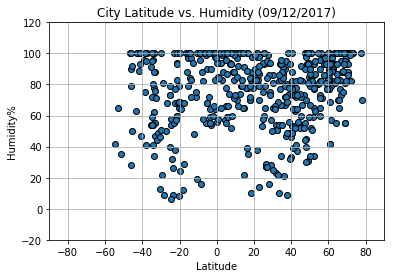

In [106]:
# Build a scatter plot for each data type
plt.scatter(df["City Lat"], 
            df["Humidity"],
            edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + local_date + ")")
plt.ylabel("Humidity%")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Latitude_Humidity.png")

# Show plot
plt.show()


### Latitude vs. Cloudiness Plot 

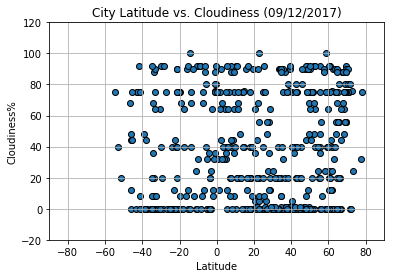

In [107]:
# Build a scatter plot for each data type
plt.scatter(df["City Lat"], 
            df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + local_date + ")")
plt.ylabel("Cloudiness%")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("Latitude_Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

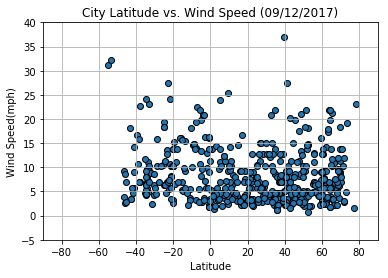

In [108]:
# Build a scatter plot for each data type
plt.scatter(df["City Lat"], 
            df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + local_date + ")")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-5, 40])

# Save the figure
plt.savefig("Latitude_WindSpeed.png")

# Show plot
plt.show()